In [1]:
import pandas as pd
import seaborn as sns
#reading freesurfer results
out_dir = '/output'
fsdata_file = out_dir+'/freesurfer_out_preped.csv'
GROUPS  = ['PD','ET','NC']
n_groups = len(GROUPS);
tab_data = pd.read_csv(fsdata_file, sep=',', header=0, index_col=0);
tab_data.shape
## basic functions
from matplotlib import pyplot as plt
# distribution of large brain parts ratio
def lr_ratio(data, items_basic, items_single, items_lr):
    item_left   = [ "Left-"+x  for x in items_lr];
    item_right  = [ "Right-"+x for x in items_lr];
    items_all = items_single + item_left + item_right + items_lr;
    tmp_data = data[items_basic+items_single+item_left+item_right];
    for x in items_lr:
        tmp_data[x]  = tmp_data["Left-"+x] + tmp_data["Right-"+x]
    #for x in items_all:
    #    tmp_data[x+"_r"] = tmp_data[x]/tmp_data["eTIV"]  
    return tmp_data, items_basic+items_all

def plot_6(tmp_data, items_disp, TITLE, sv):
    fig, axs = plt.subplots(2, 3, figsize=(12,6.5), tight_layout=1);
    sns.violinplot(y="diagnosis", x=items_disp[0], data=tmp_data, orient = 'h',
                   inner='box', ax=axs[0, 0]);
    sns.violinplot(y="diagnosis", x=items_disp[1], data=tmp_data, orient = 'h',
                   inner='box', ax= axs[0, 1]);
    sns.violinplot(y="diagnosis", x=items_disp[2], data=tmp_data, orient = 'h',
                   inner='box', ax= axs[0, 2]);
    sns.violinplot(y="diagnosis", x=items_disp[3], data=tmp_data, orient = 'h',
                   inner='box', ax= axs[1, 2]);
    sns.violinplot(y="diagnosis", x=items_disp[4], data=tmp_data, orient = 'h',
                   inner='box', ax= axs[1, 0]); 
    sns.violinplot(y="diagnosis", x=items_disp[5], data=tmp_data, orient = 'h',
                   inner='box', ax= axs[1, 1]);
    fig.suptitle('Brain Structures (abs&Ratio): '+ TITLE, fontsize=22, x=0.5, y=1.05)
    if sv:
        fig.savefig(fig_dir / Path(TITLE+'.png'))
def plot_6sex(tmp_data, items_disp, TITLE, sv):
    fig, axs = plt.subplots(2, 3, figsize=(12,6.5), tight_layout=1);
    sns.violinplot(y="diagnosis", x=items_disp[0], data=tmp_data, orient = 'h',
                   hue="sex",split=True, inner='box', ax=axs[0, 0]);
    sns.violinplot(y="diagnosis", x=items_disp[1], data=tmp_data, orient = 'h',
                   hue="sex", split=True, inner='box', ax= axs[0, 1]);
    sns.violinplot(y="diagnosis", x=items_disp[2], data=tmp_data, orient = 'h',
                   hue="sex", split=True, inner='box', ax= axs[0, 2]);
    sns.violinplot(y="diagnosis", x=items_disp[3], data=tmp_data, orient = 'h',
                   hue="sex", split=True, inner='box', ax= axs[1, 2]);
    sns.violinplot(y="diagnosis", x=items_disp[4], data=tmp_data, orient = 'h',
                   hue="sex", split=True, inner='box', ax= axs[1, 0]); 
    sns.violinplot(y="diagnosis", x=items_disp[5], data=tmp_data, orient = 'h',
                   hue="sex",  split=True, inner='box', ax= axs[1, 1]);
    fig.suptitle('Brain Structures (abs&Ratio): '+ TITLE, fontsize=22, x=0.5, y=1.05)
    if sv:
        fig.savefig(fig_dir / Path(TITLE+'.png'))
def dist_plot(df_data, focus_list, sv_name):
    for x in focus_list:
        tx=sns.jointplot(data=df_data[['age',x,'diagnosis']],
                         x='age', y= x, kind='reg')
        tx.savefig('figs/'+x+"_"+sv_name+".jpg", figsize=(24, 13))
def rm_age_sex(data, var_list):
    from sklearn import linear_model
    import numpy as np
    dat = data.copy()
    nc_data = dat[dat["is_NC"] == 1]
    x_nc = np.array([np.ones(nc_data.shape[0]), np.array((nc_data["is_Male"])), np.array((nc_data["age"]))]).T; 
    x_all= np.array([np.ones(dat.shape[0]), np.array((dat["is_Male"])), np.array((dat["age"]))]).T;
    reg_list = []; new_col=[];
    for x in var_list:
        reg = linear_model.LinearRegression()
        y_nc= np.array(nc_data[x]);
        reg.fit(x_nc, y_nc);
        tmp_col = x+"_AgeSexRemoved"
        dat[tmp_col] = dat[x]-np.matmul(x_all[:,1:], reg.coef_[1:])
        dat[tmp_col+"_resid"] = dat[x]-reg.predict(x_all)
        dat[tmp_col+"_resid_per"] = (dat[x]-reg.predict(x_all))/dat[x]
        reg_list.append(reg); new_col.append(tmp_col);
    return dat, new_col, reg_list   
# plot distribution of brian tissues
x_focus = ['eTIV', 'TotalGrayVol', 'CortexVol',
       'Brain-Stem', 'SubCortGrayVol', 'CSF', 'Left-Cerebellum-Cortex',
       'Left-Cerebellum-White-Matter', 'Right-Cerebellum-Cortex',
       'Right-Cerebellum-White-Matter', 'Cerebellum-Cortex',
       'Cerebellum-White-Matter', 'CortexVol_r', 'Brain-Stem_r',
       'SubCortGrayVol_r', 'CSF_r', 'Left-Cerebellum-Cortex_r',
       'Left-Cerebellum-White-Matter_r', 'Right-Cerebellum-Cortex_r',
       'Right-Cerebellum-White-Matter_r', 'Cerebellum-Cortex_r',
       'Cerebellum-White-Matter_r'];    
#dist_plot(tmp_data, x_focus, "age-distr")


Bad key "text.kerning_factor" on line 4 in
/usr/local/miniconda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [41]:
print(list(tab_data["BrainSegVol"]))

[1160927.0, 1076849.0, 1249930.0, 867264.0, 1181137.0, 920462.0, 1017378.0, 1231753.0, 956478.0, 1200177.0, 880955.0, 1050594.0, 982903.0, 1301073.0, 1235282.0, 1115225.0, 1222717.0, 1070914.0, 981998.0, 1077437.0, 1125782.0, 1426070.0, 1298635.0, 1027775.0, 1056898.0, 1245483.0, 1240147.0, 1170692.0, 1123931.0, 1178249.0, 1198351.0, 1022789.0, 1180061.0, 1203426.0, 1143515.0, 1034912.0, 1029405.0, 1091877.0, 1111083.0, 980607.0, 1199547.0, 1152183.0, 1096471.0, 1140506.0, 1059002.0, 1125150.0, 1051023.0, 1140269.0, 1011613.0, 973309.0, 1080587.0, 1121062.0, 1054734.0, 1131367.0, 1095854.0, 1004599.0, 1103832.0, 1135398.0, 1011315.0, 1163757.0, 1178255.0, 1031567.0, 896772.0, 1173352.0, 1193198.0, 1204293.0, 1142899.0, 951810.0, 917657.0, 1091896.0, 1135507.0, 1155742.0, 1110394.0, 1155564.0, 1076644.0, 975752.0, 1060728.0, 996148.0, 1336718.0, 1258033.0, 1111014.0, 1058934.0, 1038621.0, 1150234.0, 1268468.0, 1178835.0, 1108783.0, 1213964.0, 1215632.0, 1089277.0, 1178913.0, 1299380.0, 

In [64]:
def screen_Tukeyhsd(data, test_list):
    import statsmodels.stats.multicomp as mc
    from functools import reduce
    res_all=[]; reject_index=[];
    for i in range(len(test_list)):
        x = test_list[i];
        tmp_comp = mc.MultiComparison(data[x], data['diagnosis'])
        tmp_res = tmp_comp.tukeyhsd()
        res_all.append(tmp_res.summary())
        if sum(list(tmp_res.reject))>=2:
            reject_index.append(i)
            print(str(i)+"th Tukey HSD test positive -->> "+x)
            #print(res_all[i])
    return res_all, reject_index
non_feature_list = ["diagnosis", "age", "sex", "is_PD", "is_ET","is_NC", "is_Male", "is_Female"];
all_feature_list = tab_data.columns.drop(non_feature_list)
res_all, reject_index = screen_Tukeyhsd(tab_data, all_feature_list)
print(len(reject_index))
# rh_G_temp_sup-G_T_transv_volume, rh_S_temporal_transverse_thickness

In [2]:
# select the data
from sklearn import linear_model
import numpy as np
items_basic = ["diagnosis", "age", "sex", "is_PD", "is_ET","is_NC",
               "is_Male", "is_Female", "eTIV", "TotalGrayVol",];
items_single = ["CerebralWhiteMatterVol", "CortexVol", "Brain-Stem", "SubCortGrayVol", "CSF", 
                "3rd-Ventricle", "4th-Ventricle", "5th-Ventricle", "SupraTentorialVol", 
                "CC_Anterior", "CC_Central", "CC_Mid_Anterior", "CC_Mid_Posterior", "CC_Posterior"];
items_lr  = ["Inf-Lat-Vent", "Lateral-Ventricle", 
             "Cerebellum-Cortex", "Cerebellum-White-Matter", "WM-hypointensities", 
             "Accumbens-area", "Amygdala", "Hippocampus", 
             "Pallidum", "Caudate", "Putamen", "Thalamus-Proper"];
tmp_data, items_all = lr_ratio(tab_data, items_basic, items_single, items_lr);
rm_AgeSex_list = items_all[8:];
rm_as_data, rm_as_col_list, rm_as_reg_list = rm_age_sex(tmp_data, rm_AgeSex_list)
# Check regression residuals
resid_list = [x+"_resid_per" for x in rm_as_col_list ];
#rm_as_data[resid_list].plot.box(vert=False,figsize=(10,20))


/usr/local/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [35]:
def norm_by_feature(data, item_list, norm_item):
    t_data = data.copy();
    new_items=[];
    for x in item_list:
        new_col = x+"_r";
        t_data[new_col] = t_data[x]/t_data[norm_item];
        new_items.append(new_col)
    return t_data, new_items 
norm_item = 'eTIV_AgeSexRemoved';
rm_asr_data, rm_asr_items = norm_by_feature(rm_as_data, rm_as_col_list[1:]+rm_AgeSex_list[:], norm_item)

In [ ]:
rm_AgeSex_list#rm_asr_items                       

In [88]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.special import logit, expit
import scipy.stats as stats

def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    #aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    #, 'omega_sq']
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq']
    aov = aov[cols]
    return aov

def check_anova(dat, feature):
    from statsmodels.formula.api import ols
    from scipy.special import logit, expit
    import scipy.stats as stats
    y_str = 'Q(\"'+feature+'\") ~ '
    yr_str = 'logit(Q(\"'+feature+'_r\")) ~ '
    yas_str = 'Q(\"'+feature+'_AgeSexRemoved\") ~ '
    yasr_str = 'logit(Q(\"'+feature+'_AgeSexRemoved_r\")) ~ '
    model1 = ols(y_str + 'C(diagnosis) + C(sex)  + age', data=dat).fit()
    model2 = ols(yr_str + 'C(diagnosis) + C(sex)  + age', data=dat).fit()
    model3 = ols(yas_str + 'C(diagnosis) + C(sex)  + age', data=dat).fit()
    model4 = ols(yasr_str + 'C(diagnosis) + C(sex)  + age', data=dat).fit()
    aov_table1 = sm.stats.anova_lm(model1, typ=2)
    aov_table2 = sm.stats.anova_lm(model2, typ=2)
    aov_table3 = sm.stats.anova_lm(model3, typ=2)
    aov_table4 = sm.stats.anova_lm(model4, typ=2)
    print(feature," Shapiro-Wilk test:", stats.shapiro(model1.resid))
    print(anova_table(aov_table1))
    print(feature+" normalized ", "Shapiro-Wilk test:", stats.shapiro(model2.resid))
    print(anova_table(aov_table2))
    print(feature+" age sex controled ", "Shapiro-Wilk test:", stats.shapiro(model3.resid))
    print(anova_table(aov_table3))
    print(feature+" age sex controled and normalized ", "Shapiro-Wilk test:", stats.shapiro(model4.resid))
    print(anova_table(aov_table4))
    return anova_table(aov_table1), anova_table(aov_table2), anova_table(aov_table3), anova_table(aov_table4)
def check_ancova(dat, feature, is_logit):
    from statsmodels.formula.api import ols
    from scipy.special import logit, expit
    import scipy.stats as stats
    if is_logit:
        y_str = 'logit(Q(\"'+feature+'_r\")) ~ '
    else:
        y_str = 'Q(\"'+feature+'\") ~ '
    model1 = ols(y_str + 'C(diagnosis) + C(sex) + age', data=dat).fit()
    model2 = ols(y_str + 'C(diagnosis) + C(sex) + age + C(diagnosis):C(sex)', data=dat).fit()
    model3 = ols(y_str + 'C(diagnosis) + C(sex) + age + C(diagnosis):age', data=dat).fit()
    model4 = ols(y_str + 'C(diagnosis) + C(sex) + age + C(sex):age', data=dat).fit()
    model5 = ols(y_str + 'C(diagnosis) + C(sex) + age + C(diagnosis):C(sex):age', data=dat).fit()
    aov_table1 = sm.stats.anova_lm(model1, typ=2)
    aov_table2 = sm.stats.anova_lm(model2, typ=2)
    aov_table3 = sm.stats.anova_lm(model3, typ=2)
    aov_table4 = sm.stats.anova_lm(model4, typ=2)
    aov_table5 = sm.stats.anova_lm(model5, typ=2)
    print(feature," Shapiro-Wilk test:", stats.shapiro(model1.resid))
    print(anova_table(aov_table1))
    print(feature+" + diagnosis:sex ", "Shapiro-Wilk test:", stats.shapiro(model2.resid))
    print(anova_table(aov_table2))
    print(feature+" + diagnosis:age ", "Shapiro-Wilk test:", stats.shapiro(model3.resid))
    print(anova_table(aov_table3))
    print(feature+" + sex:age ", "Shapiro-Wilk test:", stats.shapiro(model4.resid))
    print(anova_table(aov_table4))
    print(feature+" + diagnosis:sex:age ", "Shapiro-Wilk test:", stats.shapiro(model5.resid))
    print(anova_table(aov_table5))
    return anova_table(aov_table1), anova_table(aov_table2), anova_table(aov_table3), anova_table(aov_table4), anova_table(aov_table5)

In [91]:
res=check_anova(rm_asr_data, "Cerebellum-Cortex_r")

PatsyError: Error evaluating factor: NameError: no data named 'Cerebellum-Cortex_r_r' found
    logit(Q("Cerebellum-Cortex_r_r")) ~ C(diagnosis) + C(sex)  + age
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [92]:
check_ancova(rm_asr_data, "Cerebellum-Cortex", 1)

Cerebellum-Cortex  Shapiro-Wilk test: (0.8925248980522156, 5.175105002308555e-07)
                sum_sq    df   mean_sq          F    PR(>F)    eta_sq
C(diagnosis)  0.075309   2.0  0.037655   2.632593  0.077025  0.038438
C(sex)        0.270307   1.0  0.270307  18.898265  0.000034  0.137964
age           0.226223   1.0  0.226223  15.816155  0.000135  0.115464
Residual      1.387418  97.0  0.014303        NaN       NaN       NaN
Cerebellum-Cortex + diagnosis:sex  Shapiro-Wilk test: (0.8956553339958191, 7.206197665254876e-07)
                       sum_sq    df   mean_sq          F    PR(>F)    eta_sq
C(diagnosis)         0.075309   2.0  0.037655   2.613725  0.078524  0.038293
C(sex)               0.270307   1.0  0.270307  18.762821  0.000037  0.137443
C(diagnosis):C(sex)  0.018798   2.0  0.009399   0.652401  0.523111  0.009558
age                  0.233652   1.0  0.233652  16.218497  0.000114  0.118805
Residual             1.368620  95.0  0.014407        NaN       NaN       NaN
Cerebell

(                sum_sq    df   mean_sq          F    PR(>F)    eta_sq
 C(diagnosis)  0.075309   2.0  0.037655   2.632593  0.077025  0.038438
 C(sex)        0.270307   1.0  0.270307  18.898265  0.000034  0.137964
 age           0.226223   1.0  0.226223  15.816155  0.000135  0.115464
 Residual      1.387418  97.0  0.014303        NaN       NaN       NaN,
                        sum_sq    df   mean_sq          F    PR(>F)    eta_sq
 C(diagnosis)         0.075309   2.0  0.037655   2.613725  0.078524  0.038293
 C(sex)               0.270307   1.0  0.270307  18.762821  0.000037  0.137443
 C(diagnosis):C(sex)  0.018798   2.0  0.009399   0.652401  0.523111  0.009558
 age                  0.233652   1.0  0.233652  16.218497  0.000114  0.118805
 Residual             1.368620  95.0  0.014407        NaN       NaN       NaN,
                     sum_sq    df   mean_sq          F    PR(>F)    eta_sq
 C(diagnosis)      0.075309   2.0  0.037655   2.625087  0.077683  0.038308
 C(sex)            0.2769

In [36]:
# test correlation between brain areas and diagnosis
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import glm
from scipy.special import logit, expit

m1_form = "Q(\"Cerebellum-Cortex\") ~ is_ET + is_PD + is_NC"
m1 = glm(formula=m1_form, data=rm_asr_data)
res1=m1.fit()
print(res1.summary2())
m2_form = "logit(Q(\"Cerebellum-Cortex_r\")) ~ is_ET + is_PD + is_NC"
m2 = glm(formula=m2_form, data=rm_asr_data)
res2=m2.fit()
print(res2.summary2())
m3_form = "Q(\"Cerebellum-Cortex_AgeSexRemoved\") ~ is_ET + is_PD + is_NC"
m3 = glm(formula=m3_form, data=rm_asr_data)
res3=m3.fit()
print(res3.summary2())
m4_form = "logit(Q(\"Cerebellum-Cortex_AgeSexRemoved_r\")) ~ is_ET + is_PD + is_NC"
m4 = glm(formula=m4_form, data=rm_asr_data)
res4=m4.fit()
print(res4.summary2())

                    Results: Generalized linear model
Model:              GLM                    AIC:            2167.7452      
Link Function:      identity               BIC:            9558305041.3198
Dependent Variable: Q("Cerebellum-Cortex") Log-Likelihood: -1080.9        
Date:               2020-11-13 05:09       LL-Null:        -1081.5        
No. Observations:   102                    Deviance:       9.5583e+09     
Df Model:           2                      Pearson chi2:   9.56e+09       
Df Residuals:       99                     Scale:          9.8583e+07     
Method:             IRLS                                                  
---------------------------------------------------------------------------
              Coef.      Std.Err.     z      P>|z|     [0.025      0.975]  
---------------------------------------------------------------------------
Intercept   76032.4983   743.7812  102.2243  0.0000  74574.7139  77490.2827
is_ET       23972.7466  1500.9732   15.971

In [57]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import glm
from scipy.special import logit, expit

m1_form = "is_ET ~ Q(\"Left-Cerebellum-Cortex_AgeSexRemoved\") + Q(\"Left-Cerebellum-White-Matter_AgeSexRemoved\") + \
Q(\"Right-Cerebellum-Cortex_AgeSexRemoved\") + Q(\"Right-Cerebellum-White-Matter_AgeSexRemoved\") "
m1 = glm(formula=m1_form, data=rm_asr_data[rm_asr_data["diagnosis"]!="PD"],)
res1=m1.fit()
print(res1.summary2())
m2_form = "is_PD ~ Q(\"Left-Cerebellum-Cortex_AgeSexRemoved\") + Q(\"Left-Cerebellum-White-Matter_AgeSexRemoved\") + \
Q(\"Right-Cerebellum-Cortex_AgeSexRemoved\") + Q(\"Right-Cerebellum-White-Matter_AgeSexRemoved\") "
m2 = glm(formula=m2_form, data=rm_asr_data[rm_asr_data["diagnosis"]!="ET"], )
res2=m2.fit()
print(res2.summary2())

                               Results: Generalized linear model
Model:                          GLM                         AIC:                       82.6628  
Link Function:                  identity                    BIC:                       -223.5273
Dependent Variable:             is_ET                       Log-Likelihood:            -36.331  
Date:                           2020-11-13 05:58            LL-Null:                   -45.475  
No. Observations:               62                          Deviance:                  11.719   
Df Model:                       4                           Pearson chi2:              11.7     
Df Residuals:                   57                          Scale:                     0.20560  
Method:                         IRLS                                                            
------------------------------------------------------------------------------------------------
                                                  Coef.  Std.E

In [55]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(logit(rm_asr_data['Cerebellum-Cortex_AgeSexRemoved']), rm_asr_data['diagnosis'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "bonf")
tbl

/usr/local/miniconda/lib/python3.7/site-packages/statsmodels/stats/multitest.py:150: RuntimeWarning: invalid value encountered in less_equal
  reject = pvals <= alphacBonf
/usr/local/miniconda/lib/python3.7/site-packages/statsmodels/stats/multitest.py:254: RuntimeWarning: invalid value encountered in greater
  pvals_corrected[pvals_corrected>1] = 1


<class 'statsmodels.iolib.table.SimpleTable'>

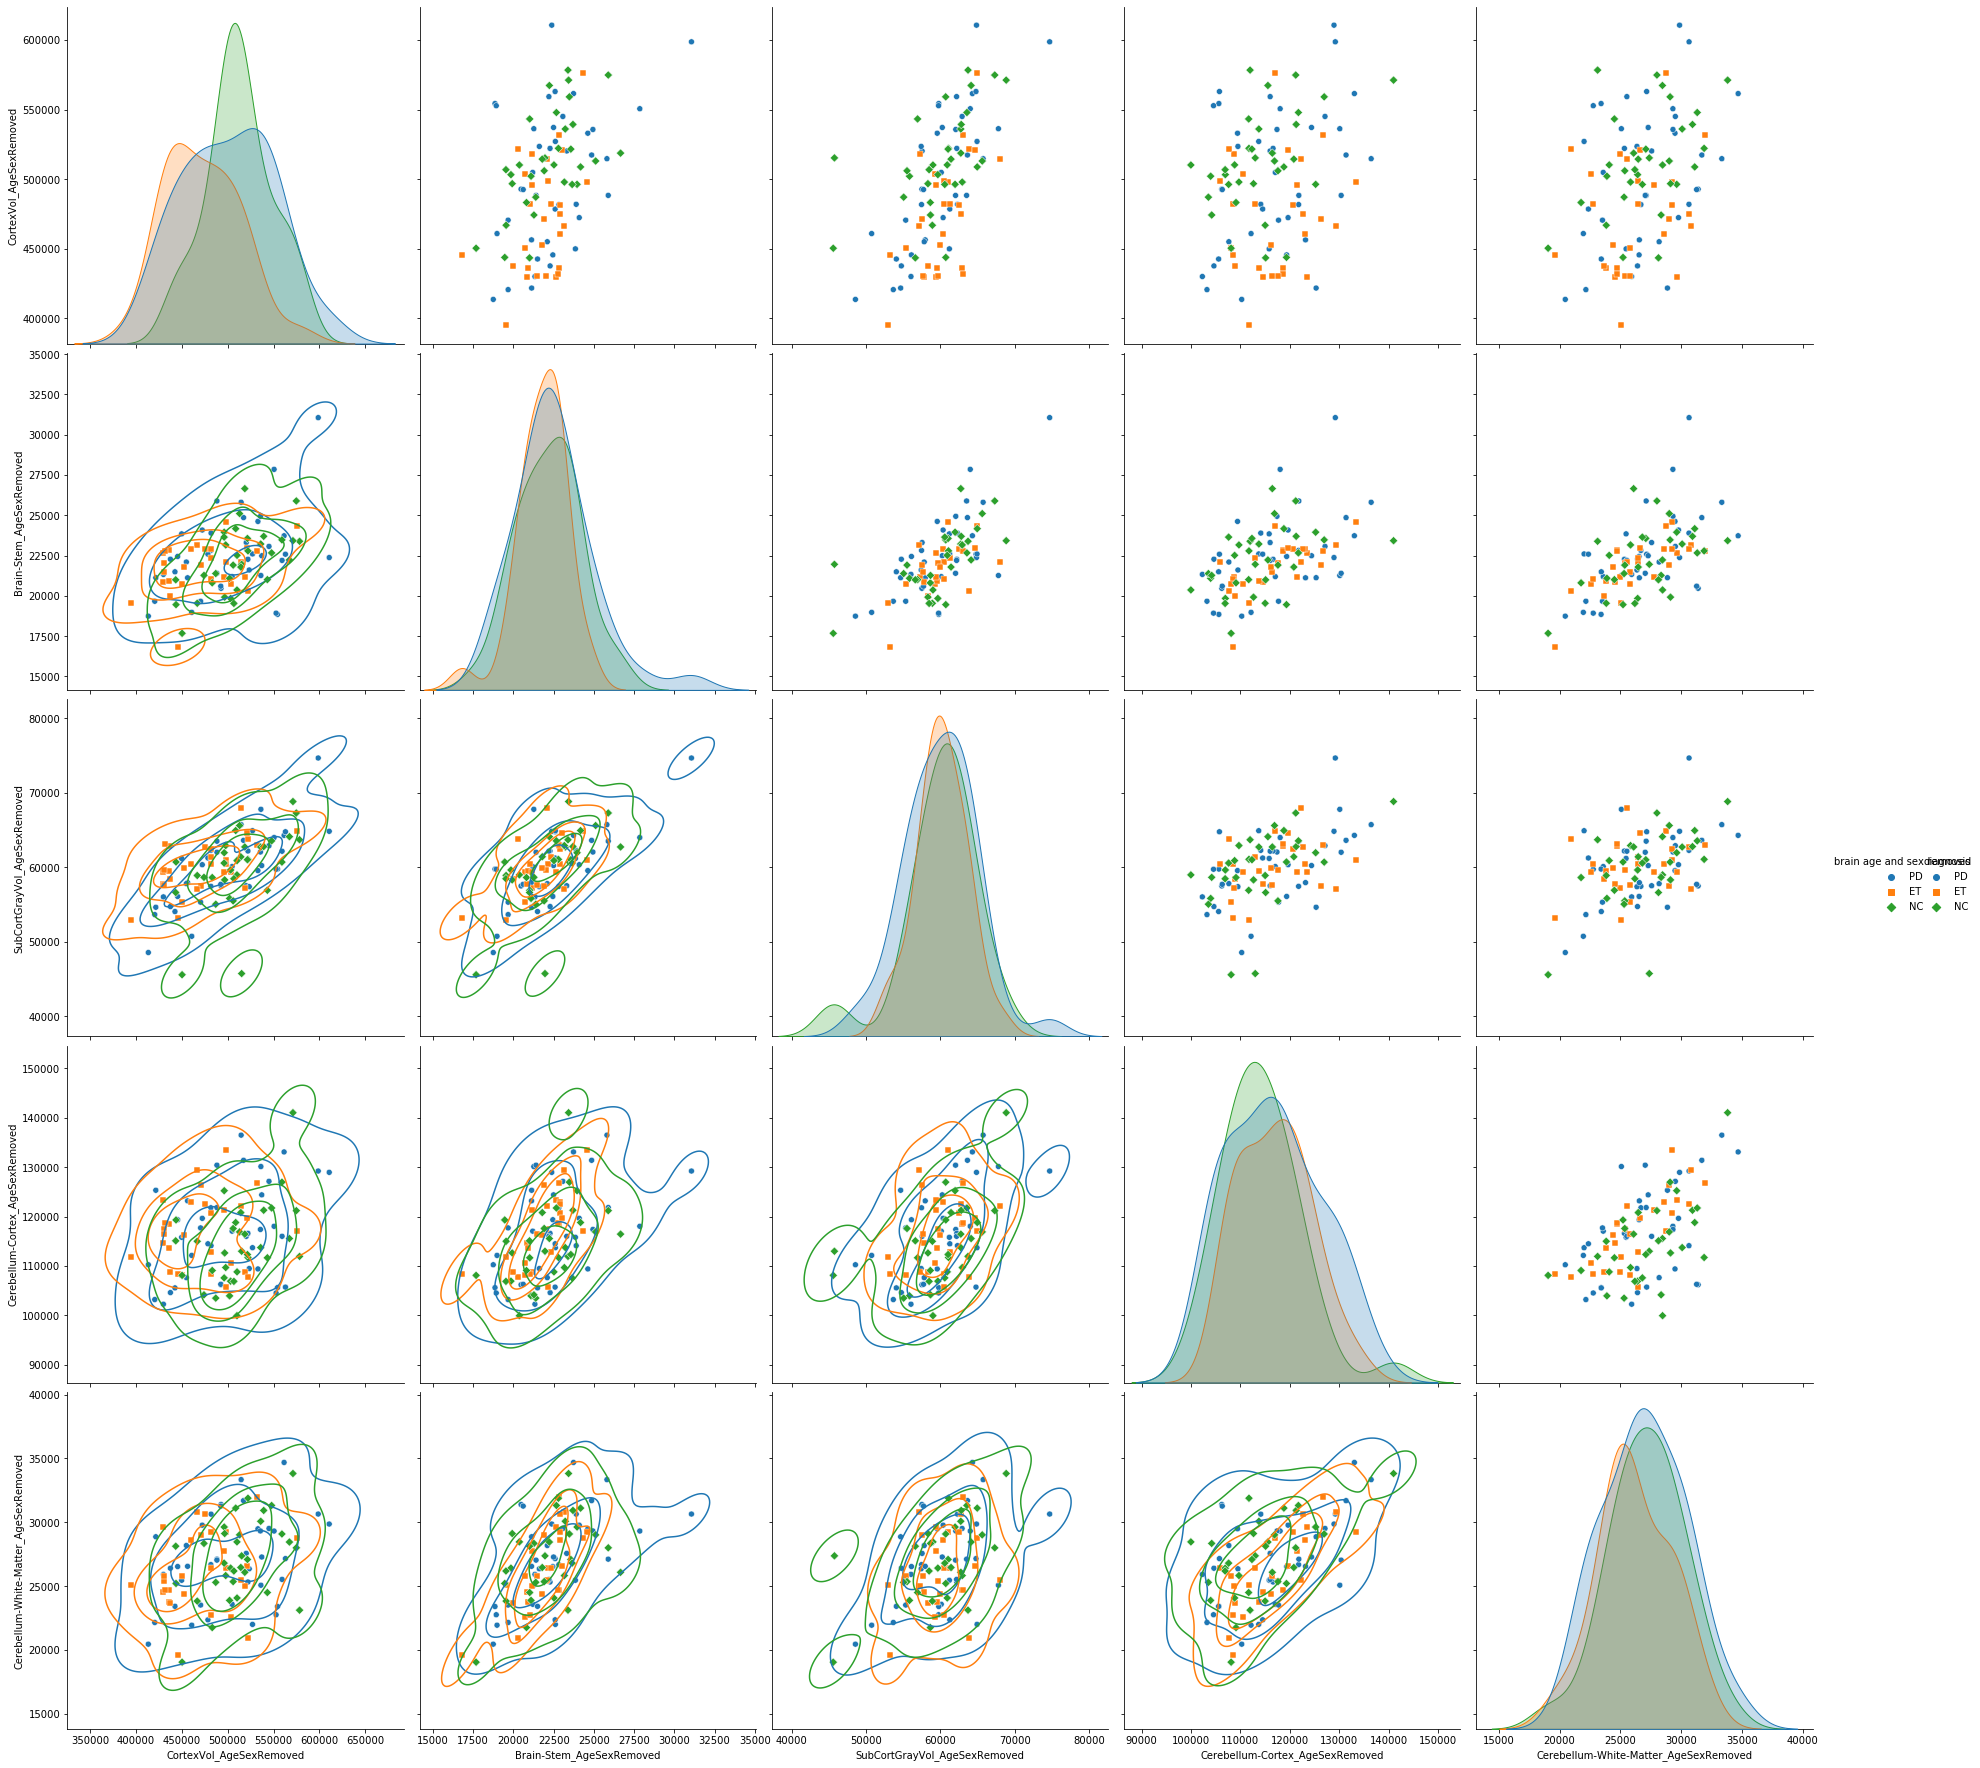

In [83]:
items_focus = ['CortexVol_AgeSexRemoved', 'Brain-Stem_AgeSexRemoved', 'SubCortGrayVol_AgeSexRemoved', 
               'Cerebellum-Cortex_AgeSexRemoved','Cerebellum-White-Matter_AgeSexRemoved'];
t1=sns.pairplot(rm_asr_data, vars=items_focus,  hue="diagnosis", markers=["o", "s", "D"],
                diag_kind="kde", height=5)
t1.map_lower(sns.kdeplot, levels=4, color=".2")
t1.add_legend(title="brain age and sex removed", adjust_subtitles=True)
#t1.savefig("brain_all.jpg", figsize=(12,6.5))

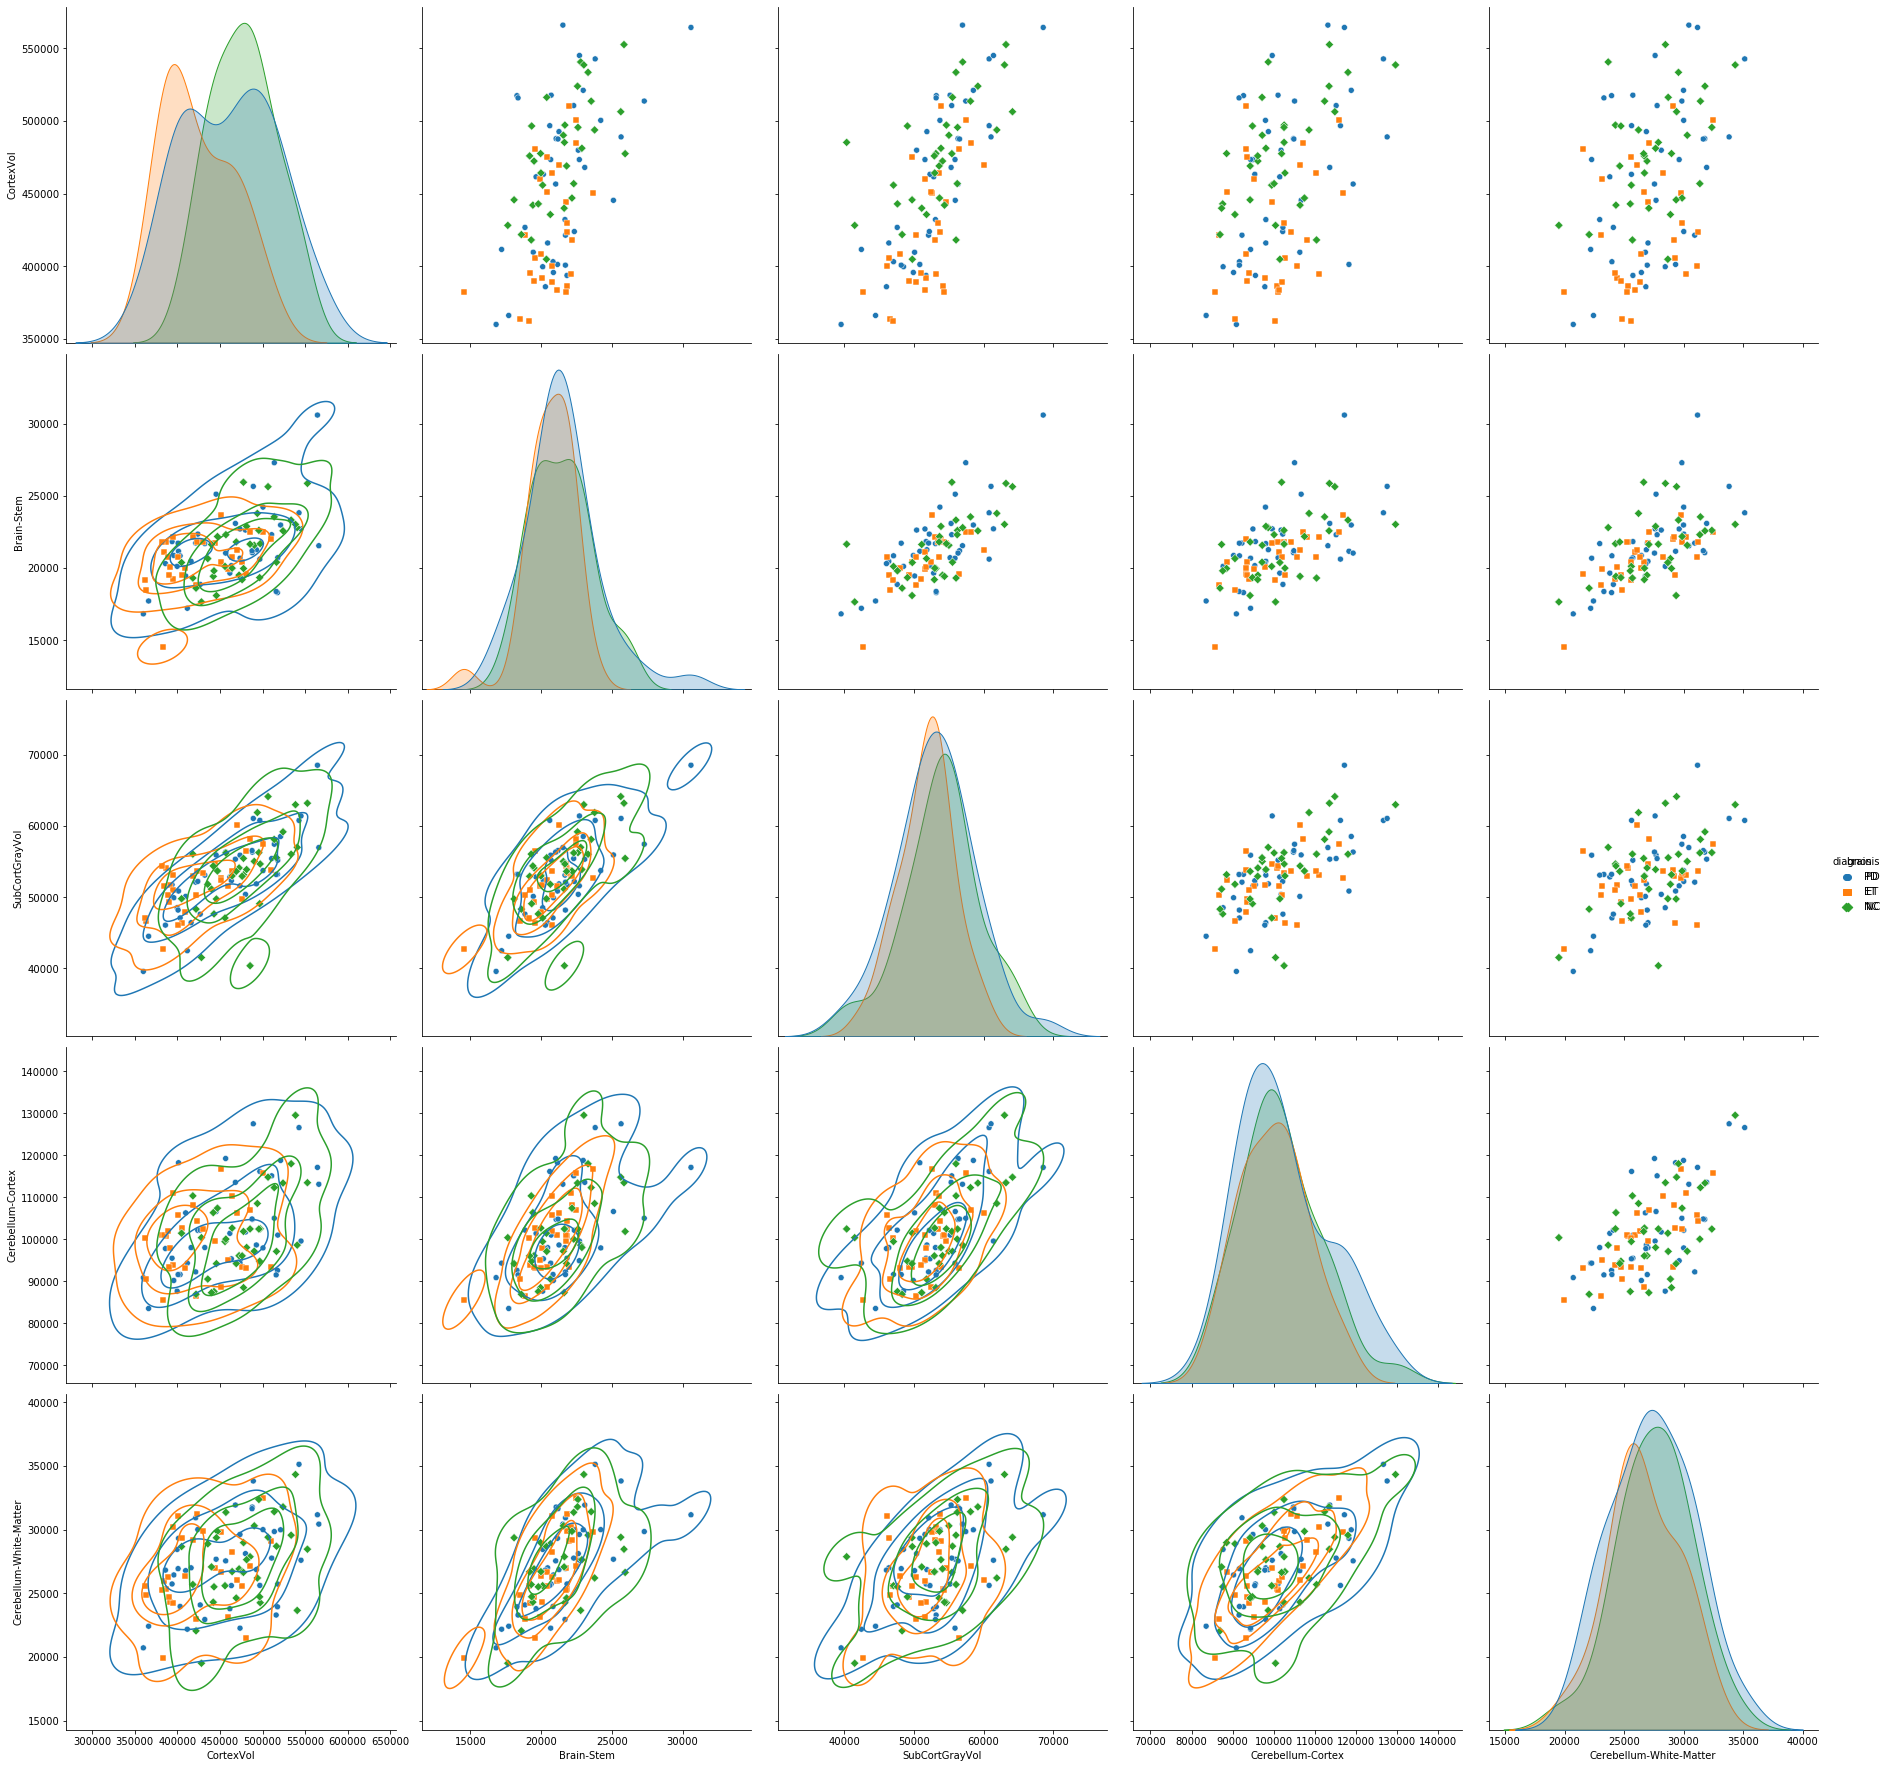

In [84]:
items_focus = ['CortexVol', 'Brain-Stem', 'SubCortGrayVol', 
               'Cerebellum-Cortex','Cerebellum-White-Matter'];
t2=sns.pairplot(rm_asr_data, vars=items_focus,  hue="diagnosis", markers=["o", "s", "D"],
                diag_kind="kde", height=5)
t2.map_lower(sns.kdeplot, levels=4, color=".2")
t2.add_legend(title="brain", adjust_subtitles=True)
#t1.savefig("brain_all.jpg", figsize=(12,6.5))

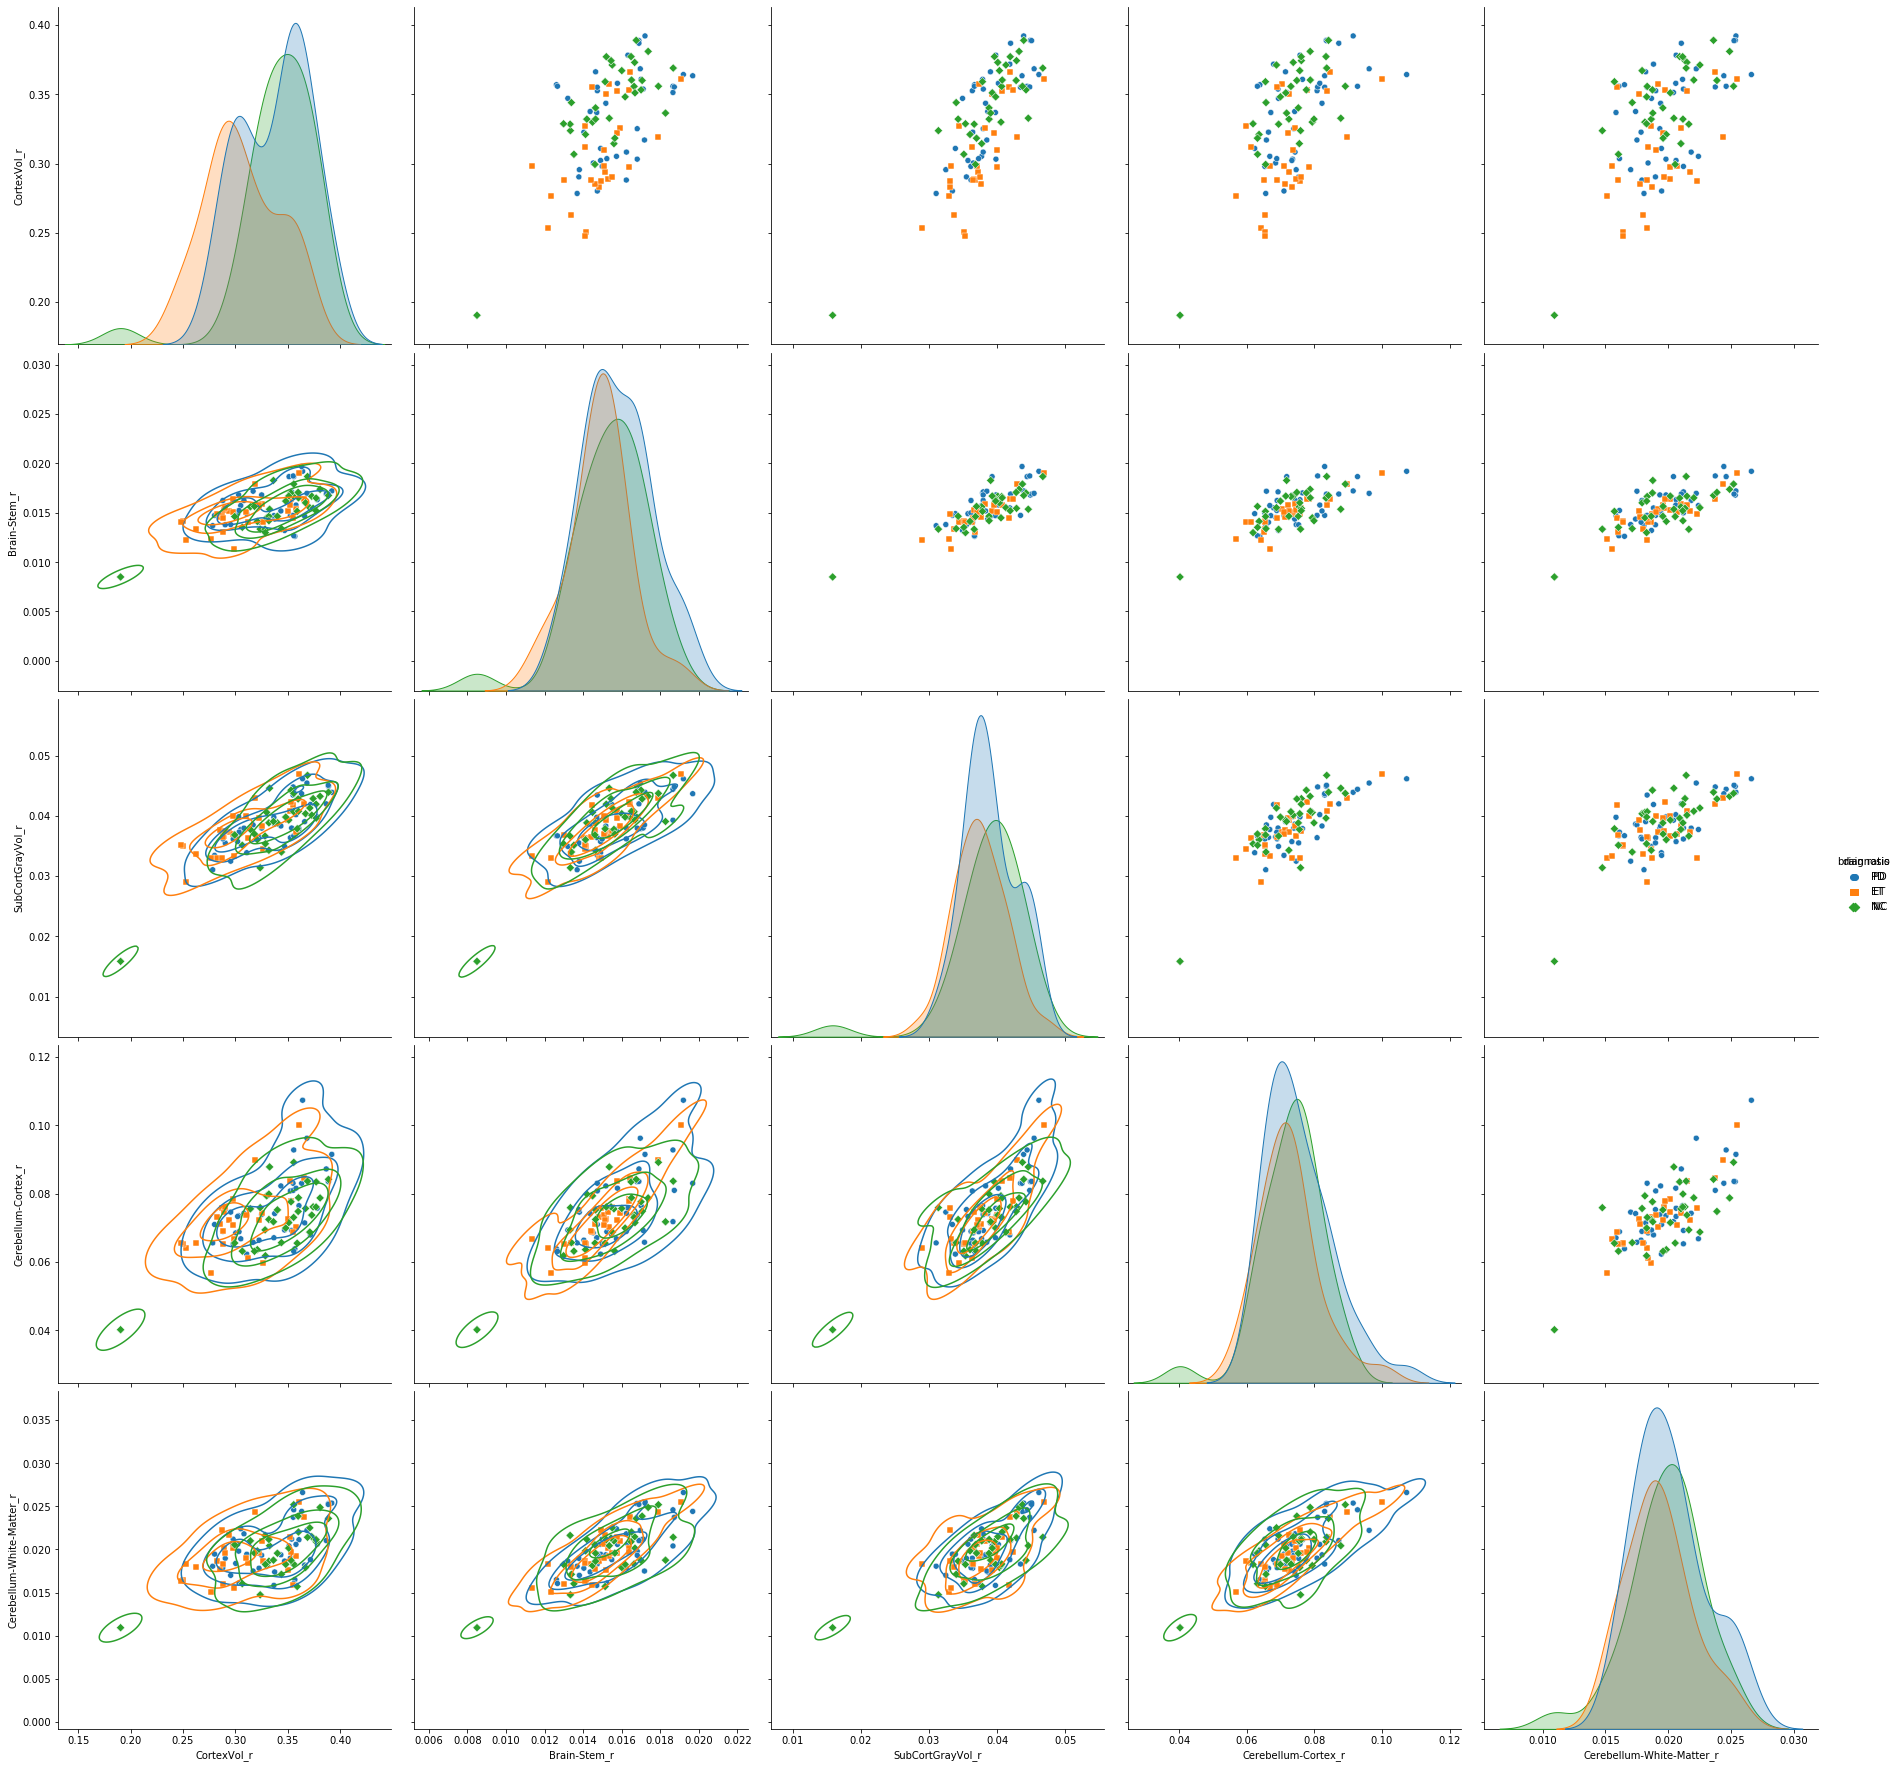

In [85]:
items_focus = ['CortexVol_r', 'Brain-Stem_r', 'SubCortGrayVol_r', 
               'Cerebellum-Cortex_r','Cerebellum-White-Matter_r'];
t3=sns.pairplot(rm_asr_data, vars=items_focus,  hue="diagnosis", markers=["o", "s", "D"],
                diag_kind="kde", height=5)
t3.map_lower(sns.kdeplot, levels=4, color=".2")
t3.add_legend(title="brain ratio", adjust_subtitles=True)
#t1.savefig("brain_all.jpg", figsize=(12,6.5))

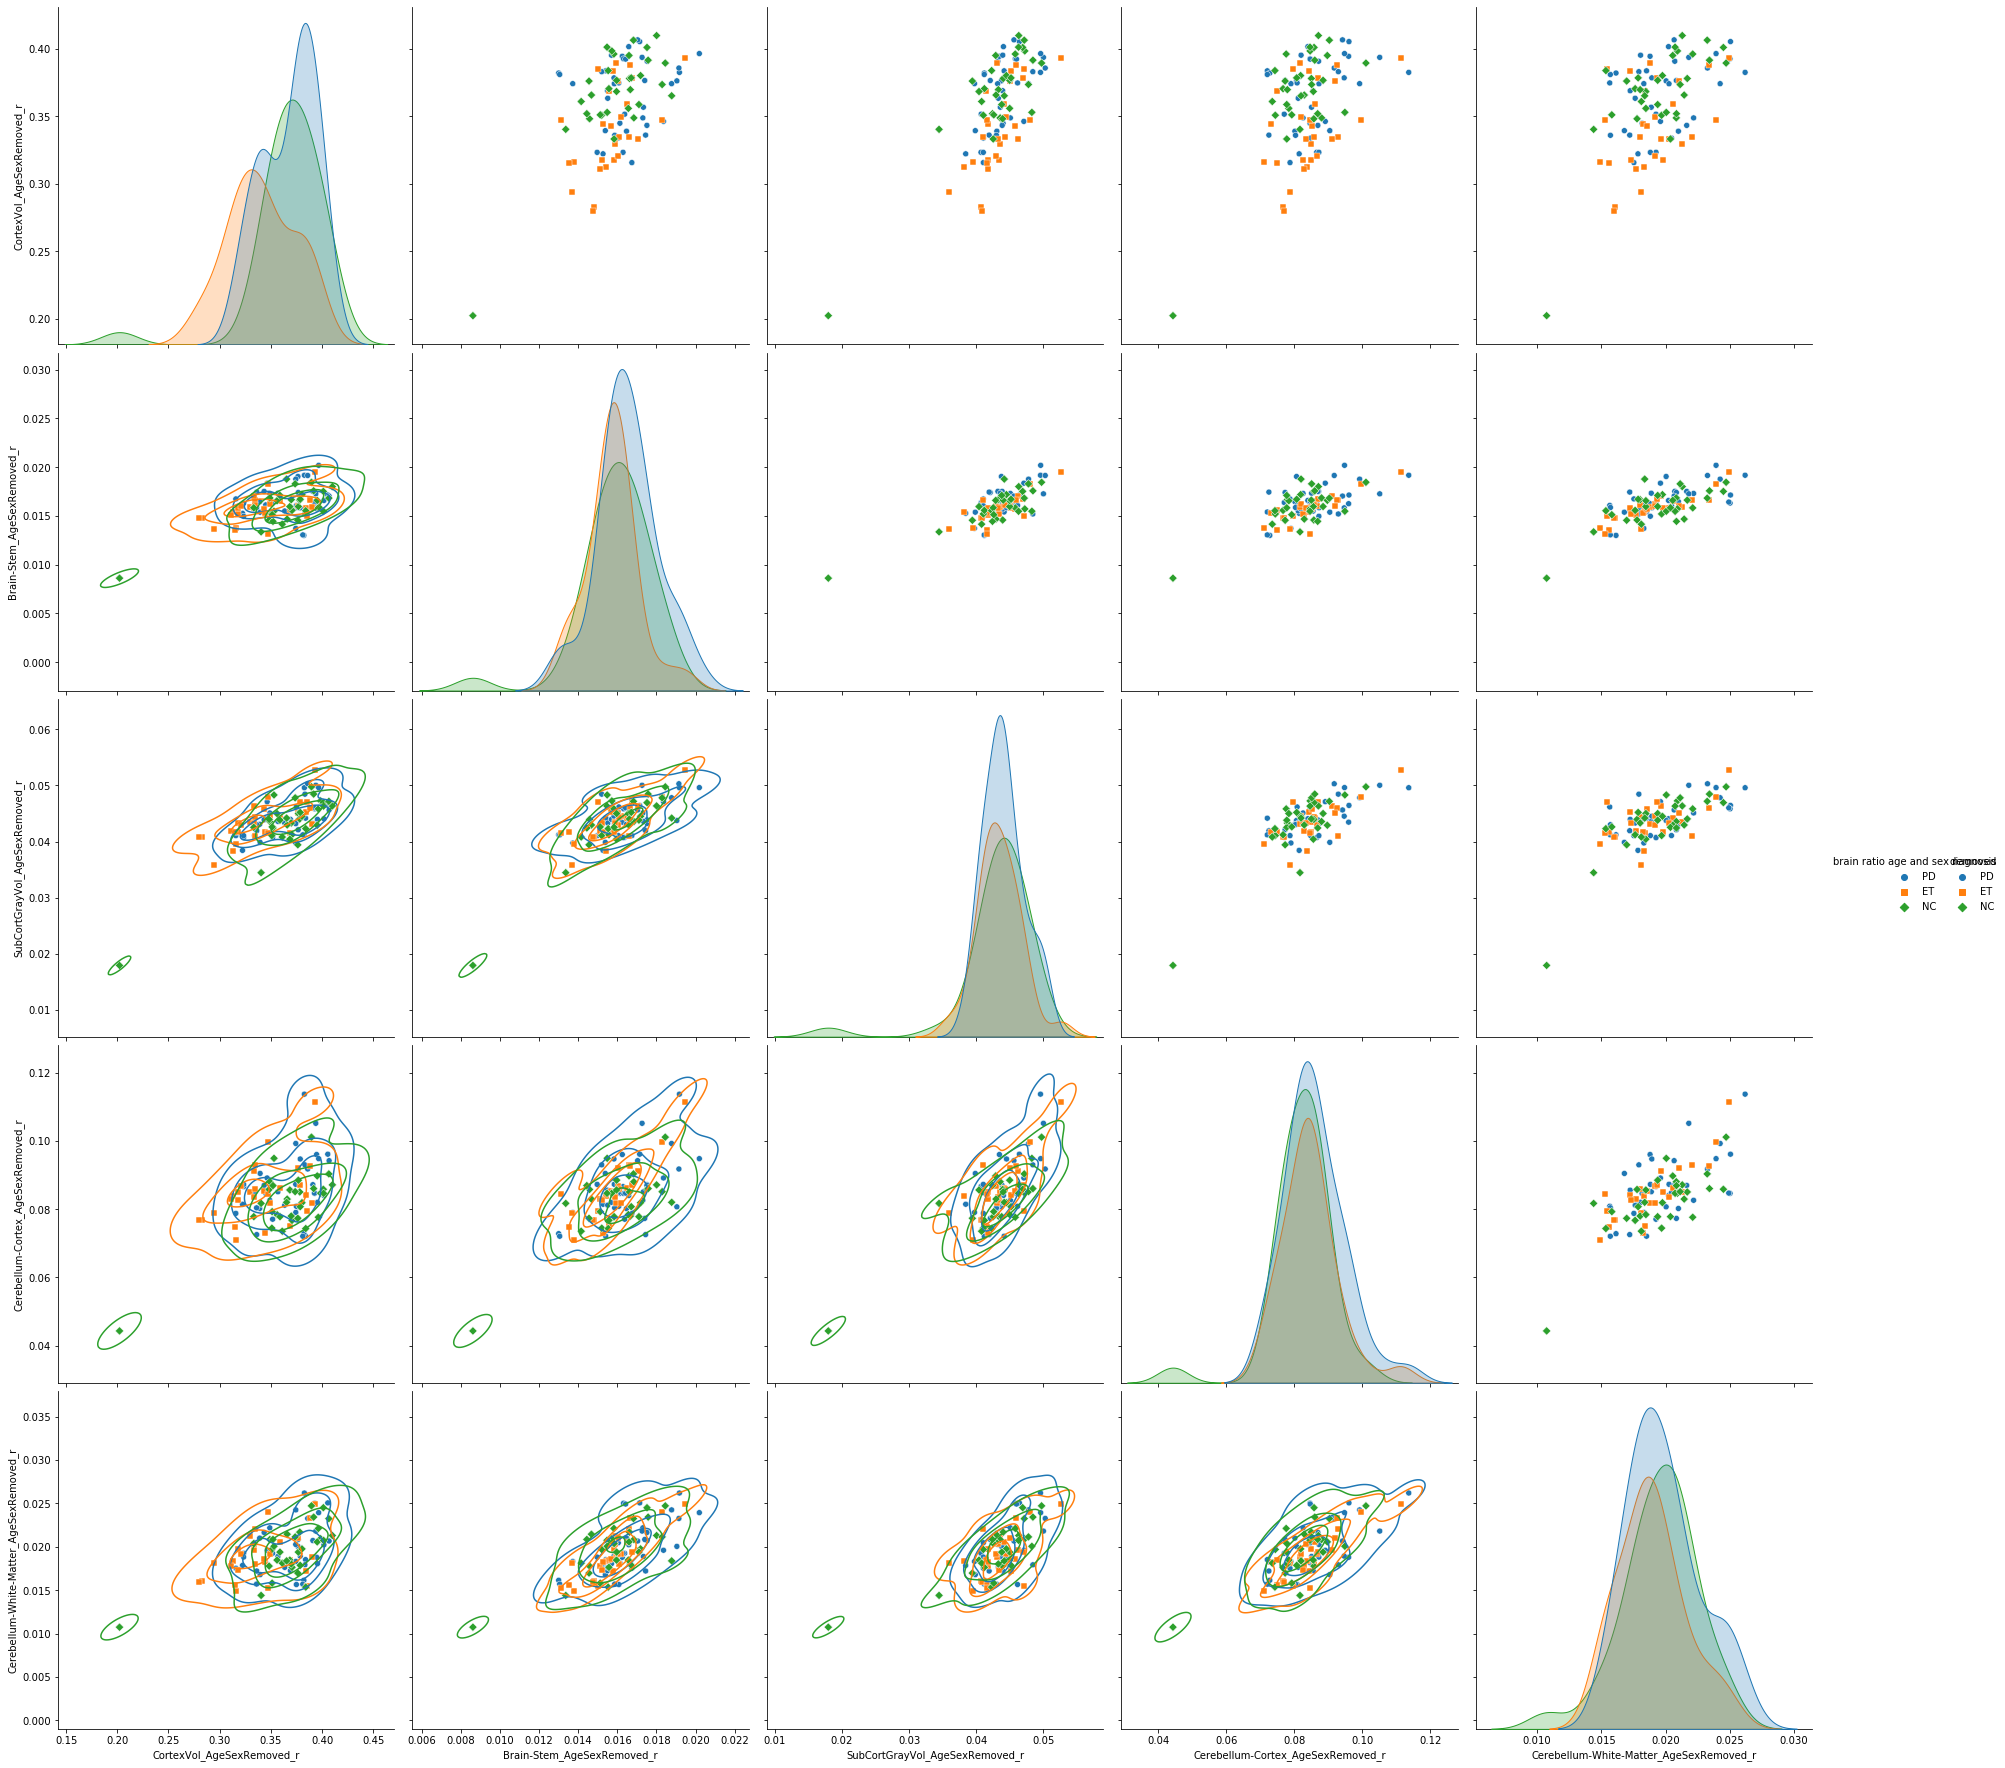

In [86]:
items_focus = ['CortexVol_AgeSexRemoved_r', 'Brain-Stem_AgeSexRemoved_r', 'SubCortGrayVol_AgeSexRemoved_r', 
               'Cerebellum-Cortex_AgeSexRemoved_r','Cerebellum-White-Matter_AgeSexRemoved_r'];
t1=sns.pairplot(rm_asr_data, vars=items_focus,  hue="diagnosis", markers=["o", "s", "D"],
                diag_kind="kde", height=5)
t1.map_lower(sns.kdeplot, levels=4, color=".2")
t1.add_legend(title="brain ratio age and sex removed", adjust_subtitles=True)
#t1.savefig("brain_all.jpg", figsize=(12,6.5))

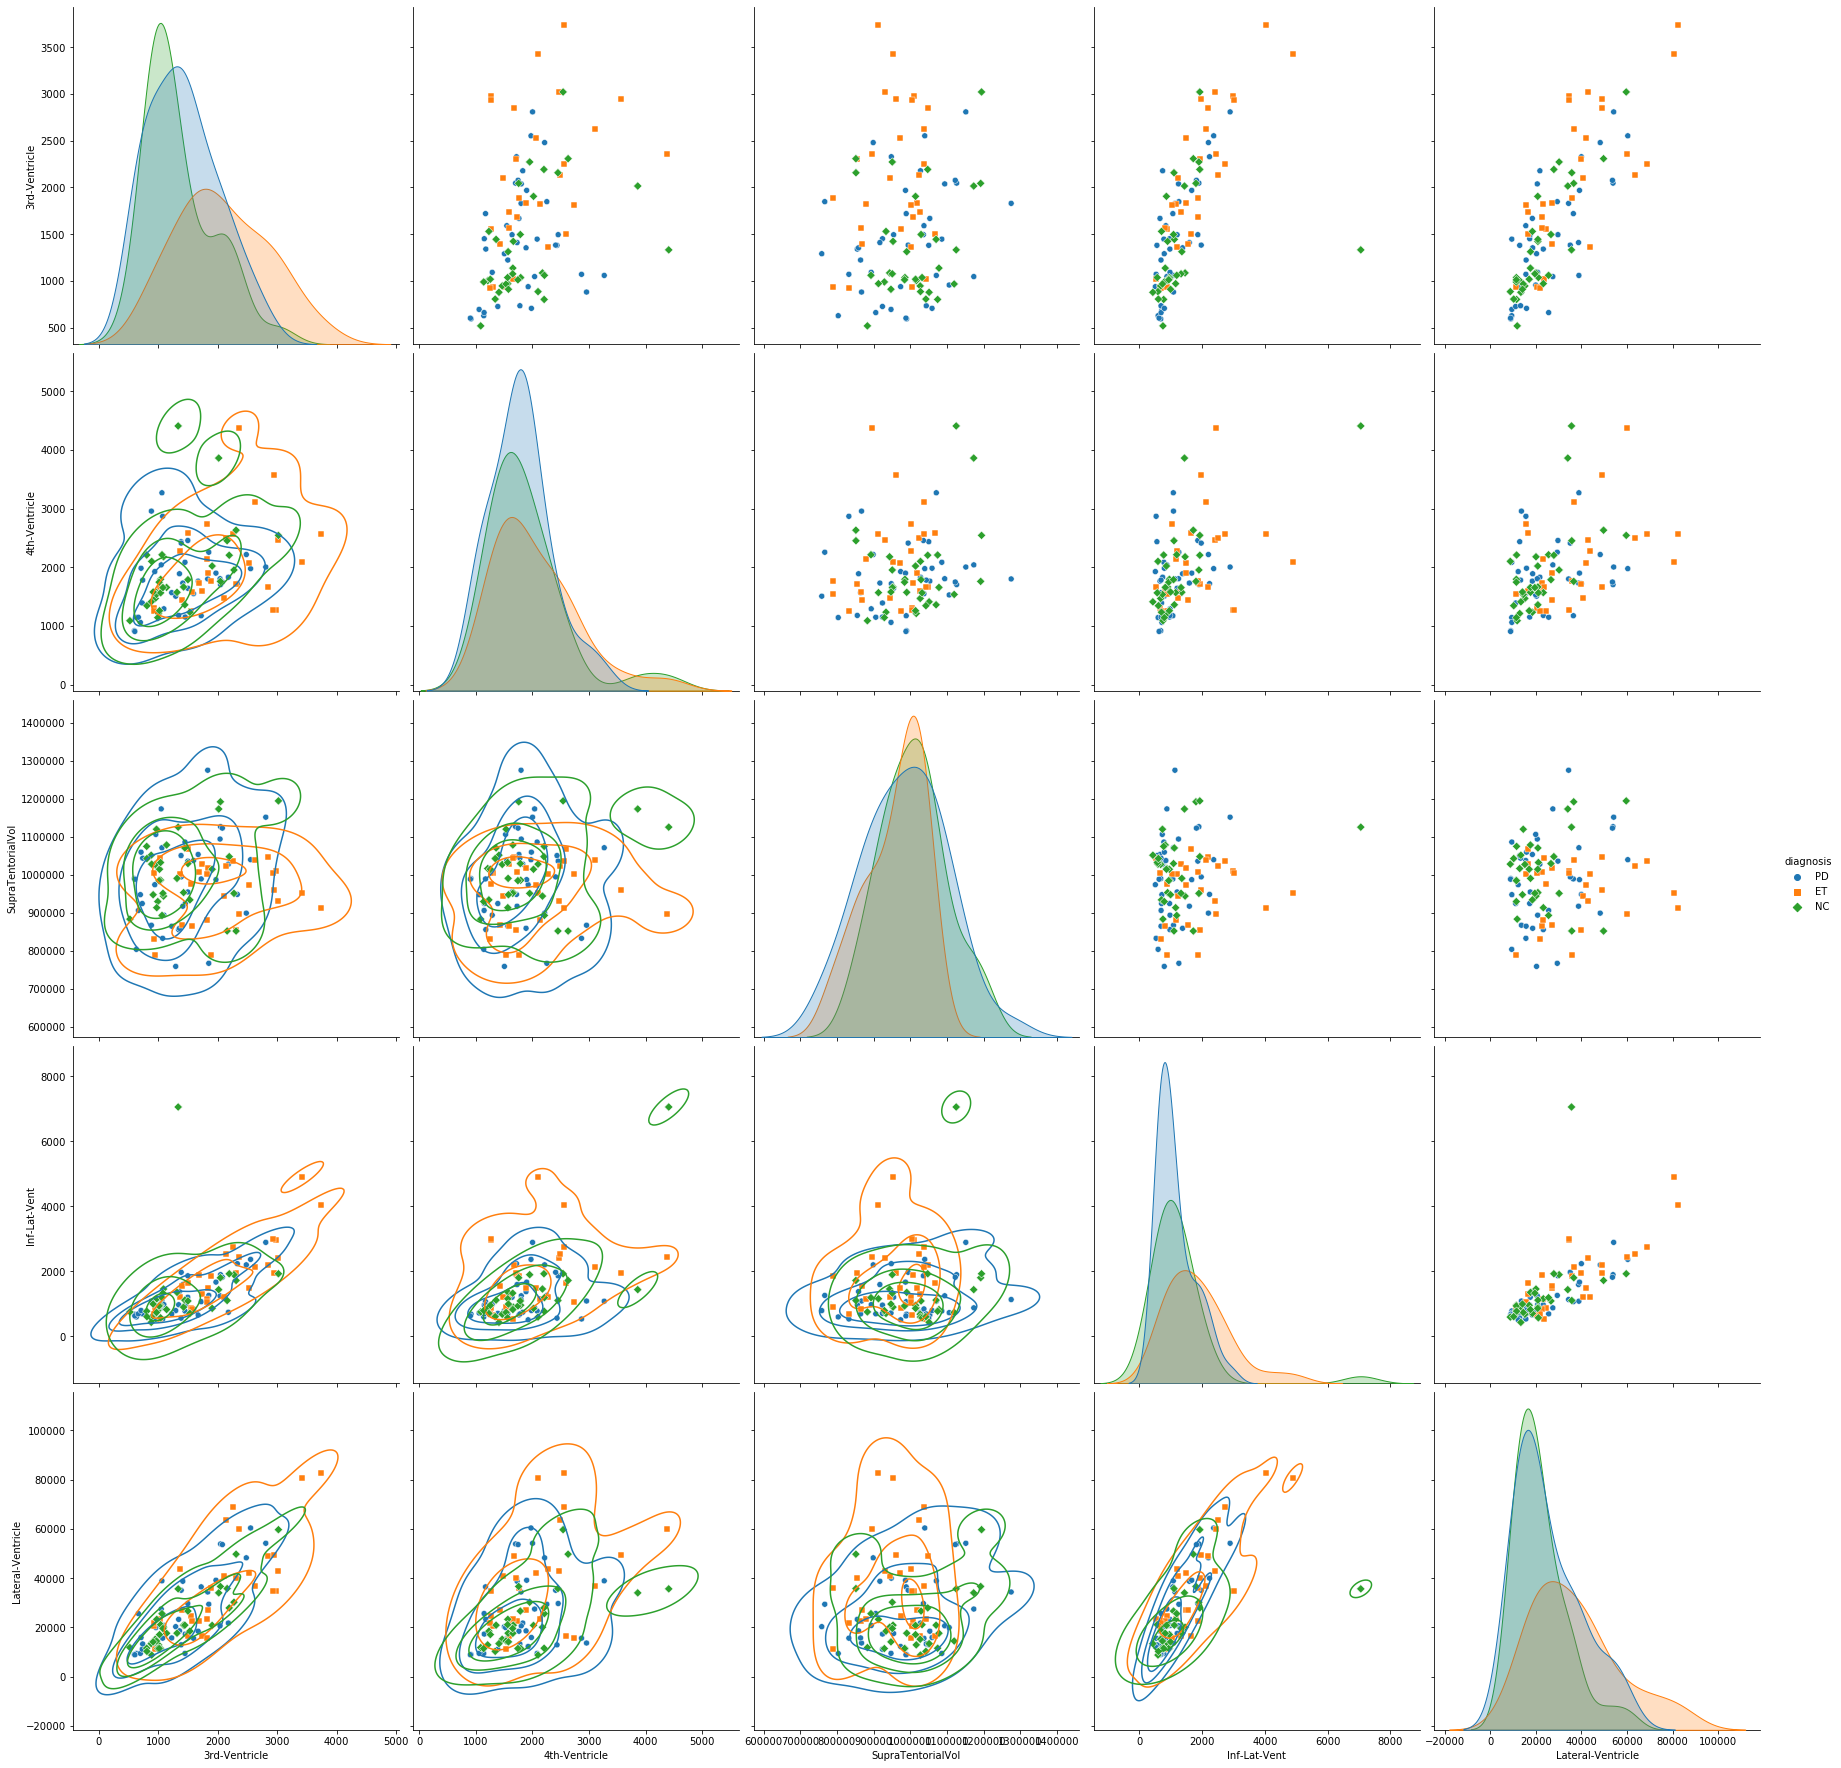

In [94]:
items_focus = ["3rd-Ventricle", "4th-Ventricle", "SupraTentorialVol", "Inf-Lat-Vent", "Lateral-Ventricle"];
t1=sns.pairplot(rm_asr_data, vars=items_focus,  hue="diagnosis", markers=["o", "s", "D"],
                diag_kind="kde", height=5)
t1.map_lower(sns.kdeplot, levels=4, color=".2")

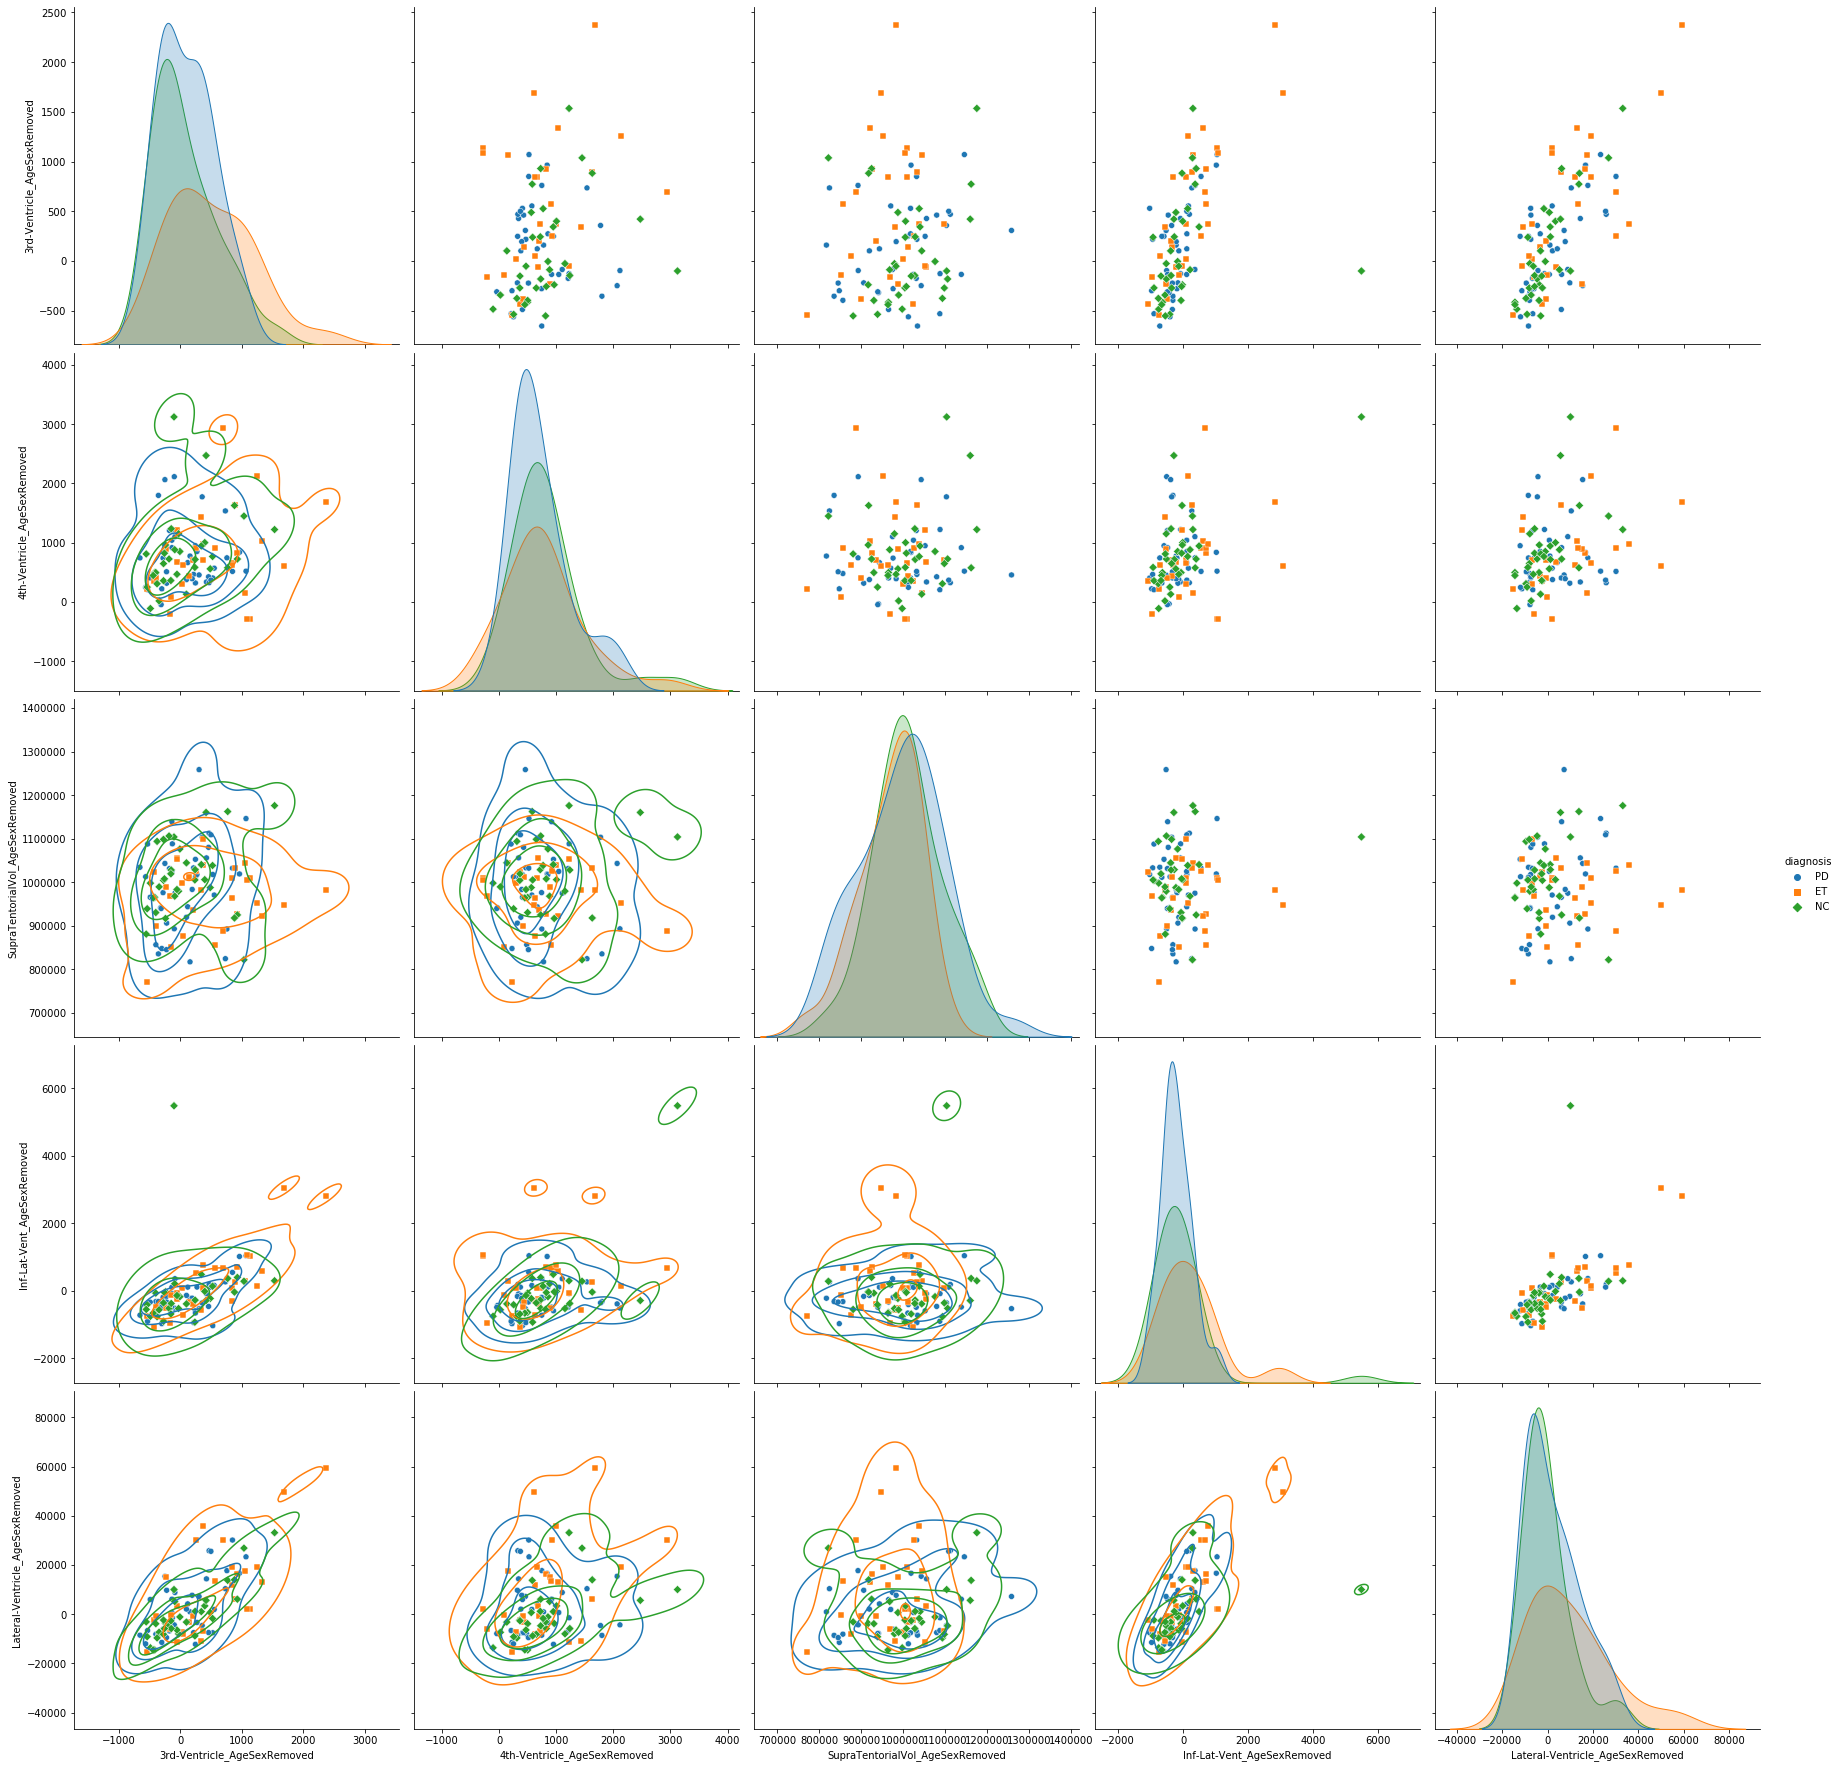

In [95]:
items_focus = ["3rd-Ventricle_AgeSexRemoved", "4th-Ventricle_AgeSexRemoved", "SupraTentorialVol_AgeSexRemoved", "Inf-Lat-Vent_AgeSexRemoved", 
               "Lateral-Ventricle_AgeSexRemoved"];
t1=sns.pairplot(rm_asr_data, vars=items_focus,  hue="diagnosis", markers=["o", "s", "D"],
                diag_kind="kde", height=5)
t1.map_lower(sns.kdeplot, levels=4, color=".2")

In [60]:
# importing libraries 
import statsmodels.api as sm 
import pandas as pd  
  
# loading the training dataset  
et_data = rm_asr_data[rm_asr_data["diagnosis"]!="PD"].copy();
pd_data = rm_asr_data[rm_asr_data["diagnosis"]!="ET"].copy();

# defining the dependent and independent variables 
features_list = ['CortexVol_AgeSexRemoved', 'Brain-Stem_AgeSexRemoved', 'SubCortGrayVol_AgeSexRemoved',
                 'Cerebellum-Cortex_AgeSexRemoved','Cerebellum-White-Matter_AgeSexRemoved']
# 'Accumbens-area_AgeSexRemoved', 'Amygdala_AgeSexRemoved', 'Hippocampus_AgeSexRemoved',
    #             'Pallidum_AgeSexRemoved', 'Caudate_AgeSexRemoved', 'Putamen_AgeSexRemoved', 'Thalamus-Proper_AgeSexRemoved'
    
et_Xtrain = et_data[features_list] 
et_ytrain = et_data[['is_ET']] 
pd_Xtrain = pd_data[features_list] 
pd_ytrain = pd_data[['is_PD']] 
   
# building the model and fitting the data 
et_log_reg = sm.Logit(et_ytrain, et_Xtrain).fit() 
pd_log_reg = sm.Logit(pd_ytrain, pd_Xtrain).fit() 

print("ET reg: ", et_log_reg.summary())
print("PD reg: ", pd_log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.356910
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.565789
         Iterations 5
ET reg:                             Logit Regression Results                           
Dep. Variable:                  is_ET   No. Observations:                   62
Model:                          Logit   Df Residuals:                       50
Method:                           MLE   Df Model:                           11
Date:                Fri, 13 Nov 2020   Pseudo R-squ.:                  0.4835
Time:                        06:14:56   Log-Likelihood:                -22.128
converged:                       True   LL-Null:                       -42.846
Covariance Type:            nonrobust   LLR p-value:                 2.028e-05
                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------

In [61]:
features_list = ['CortexVol_AgeSexRemoved', 'Brain-Stem_AgeSexRemoved', 'SubCortGrayVol_AgeSexRemoved',
                 'Cerebellum-Cortex_AgeSexRemoved','Cerebellum-White-Matter_AgeSexRemoved']
# 'Accumbens-area_AgeSexRemoved', 'Amygdala_AgeSexRemoved', 'Hippocampus_AgeSexRemoved',
    #             'Pallidum_AgeSexRemoved', 'Caudate_AgeSexRemoved', 'Putamen_AgeSexRemoved', 'Thalamus-Proper_AgeSexRemoved'
    
et_Xtrain = et_data[features_list] 
et_ytrain = et_data[['is_ET']] 
pd_Xtrain = pd_data[features_list] 
pd_ytrain = pd_data[['is_PD']] 
   
# building the model and fitting the data 
et_log_reg = sm.Logit(et_ytrain, et_Xtrain).fit() 
pd_log_reg = sm.Logit(pd_ytrain, pd_Xtrain).fit() 

print("ET reg: ", et_log_reg.summary())
print("PD reg: ", pd_log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.485508
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.652384
         Iterations 4
ET reg:                             Logit Regression Results                           
Dep. Variable:                  is_ET   No. Observations:                   62
Model:                          Logit   Df Residuals:                       57
Method:                           MLE   Df Model:                            4
Date:                Fri, 13 Nov 2020   Pseudo R-squ.:                  0.2974
Time:                        06:18:10   Log-Likelihood:                -30.101
converged:                       True   LL-Null:                       -42.846
Covariance Type:            nonrobust   LLR p-value:                 4.011e-05
                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------

In [54]:
# one-way anova
import pandas as pd
import researchpy as rp
import scipy.stats as stats

def check_stats(data, item):
    print(rp.summary_cont(data[item]))
    print(rp.summary_cont(data[item].groupby(data['diagnosis'])))
    anova_res = stats.f_oneway(data[item][data['diagnosis'] == 'PD'],
                               data[item][data['diagnosis'] == 'ET'],
                               data[item][data['diagnosis'] == 'NC'])
    print("F=", anova_res.statistic, "p-val=", anova_res.pvalue)
    return anova_res
anova_res=check_stats(rm_asr_data, 'Cerebellum-White-Matter_AgeSexRemoved')



                                Variable      N        Mean         SD  \
0  Cerebellum-White-Matter_AgeSexRemoved  102.0  26812.9717  3188.3921   

         SE   95% Conf.    Interval  
0  315.6979  26186.7121  27439.2314  


            N        Mean         SD        SE   95% Conf.    Interval
diagnosis                                                             
ET         29  26186.6151  2990.5739  555.3356  25049.0616  27324.1686
NC         33  27145.0292  3117.8287  542.7443  26039.4952  28250.5632
PD         40  26993.1329  3392.8646  536.4590  25908.0421  28078.2236
F= 0.7992186754683067 p-val= 0.45255984569115004
